In [1]:
import numpy as np
import pandas as pd
import string
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [3]:
train_csv = pd.read_csv('./data/sign_mnist_train.csv', sep=",")
test_csv = pd.read_csv('./data/sign_mnist_test.csv', sep=",")

train_labels = train_csv['label']
train_csv.drop('label', axis=1, inplace=True)

test_labels = test_csv['label']
test_csv.drop('label', axis=1, inplace=True)

train_data = train_csv.values
train_labels = train_labels.values

test_data = test_csv.values
test_labels = test_labels.values

In [4]:
def reshape_2d(data,dim):
    reshaped = []
    for i in data:
        reshaped.append(i.reshape(1,dim,dim))

    return np.array(reshaped)

In [5]:
train_data = reshape_2d(train_data,28)
test_data = reshape_2d(test_data,28)

train_data = torch.FloatTensor(train_data)
train_labels = torch.LongTensor(train_labels.tolist())

test_data = torch.FloatTensor(train_data)
test_labels = torch.LongTensor(train_labels.tolist())

In [6]:
Alph_labels = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I',
        10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R',
        18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y' }


In [7]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels= 10, kernel_size = 3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(10, 20, 3),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.conv3 = nn.Sequential(
            nn.Conv2d(20, 30, 3),
            nn.ReLU(),
            nn.Dropout2d()
        )

        self.fc = nn.Sequential(
            nn.Linear(270, 270),
            nn.ReLU(),
            nn.Linear(270, 26),
            nn.ReLU(),

        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        self.softmax = nn.LogSoftmax(dim=1)
        #return x

        return self.softmax(x)


In [8]:
model = CNN()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = "cpu"
model.to(device)

test_data, test_labels = test_data.to(device), test_labels.to(device)
train_data, train_labels = train_data.to(device), train_labels.to(device)

In [9]:
random_data = torch.rand((1, 1, 28, 28))

my_nn = CNN()
result = my_nn(random_data)
print (result)

tensor([[-3.2578, -3.1911, -3.2145, -3.2904, -3.2862, -3.2777, -3.2904, -3.2035,
         -3.2794, -3.2767, -3.2904, -3.2712, -3.2904, -3.2133, -3.2039, -3.2047,
         -3.2468, -3.2904, -3.2370, -3.2756, -3.2836, -3.2904, -3.2904, -3.2904,
         -3.2285, -3.2504]], grad_fn=<LogSoftmaxBackward0>)


In [10]:
epochs = 100
batch_size = 100
learning_rate = 0.001

optimizer = optim.SGD(model.parameters(), learning_rate, momentum=0.7)
loss_fn = nn.CrossEntropyLoss()

In [11]:
loss_log = []
acc_log = []

for e in range(epochs):
    for i in range(0, train_data.shape[0], batch_size):
        train = train_data[i:i + batch_size]
        labels = train_labels[i:i + batch_size]



        pred = model(Variable(train))
        loss = loss_fn(pred, Variable(labels))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if i % 100 == 0:
            #pred = net(Variable(test_data_formated))
            loss_log.append(loss.item())
            #acc_log.append(model.evaluate(torch.max(model(Variable(test_x[:500])).data, 1)[1], test_y[:500]))

    #print('Epoch: {} - Loss: {:.6f}'.format(e + 1, loss.item()))

Epoch: 1 - Loss: 2.714922
Epoch: 2 - Loss: 2.397231
Epoch: 3 - Loss: 2.085758
Epoch: 4 - Loss: 2.096905
Epoch: 5 - Loss: 1.860308
Epoch: 6 - Loss: 1.841910
Epoch: 7 - Loss: 1.365453
Epoch: 8 - Loss: 1.445416
Epoch: 9 - Loss: 1.201793
Epoch: 10 - Loss: 1.126538
Epoch: 11 - Loss: 1.031424
Epoch: 12 - Loss: 0.970790
Epoch: 13 - Loss: 0.888953
Epoch: 14 - Loss: 0.968823
Epoch: 15 - Loss: 0.797810
Epoch: 16 - Loss: 0.880297
Epoch: 17 - Loss: 0.809458
Epoch: 18 - Loss: 0.451928
Epoch: 19 - Loss: 0.340169
Epoch: 20 - Loss: 0.713187
Epoch: 21 - Loss: 0.436399
Epoch: 22 - Loss: 0.495099
Epoch: 23 - Loss: 0.503713
Epoch: 24 - Loss: 0.406178
Epoch: 25 - Loss: 0.325999
Epoch: 26 - Loss: 0.341638
Epoch: 27 - Loss: 0.372296
Epoch: 28 - Loss: 0.380078
Epoch: 29 - Loss: 0.372283
Epoch: 30 - Loss: 0.301819
Epoch: 31 - Loss: 0.255138
Epoch: 32 - Loss: 0.268213
Epoch: 33 - Loss: 0.254826
Epoch: 34 - Loss: 0.358610
Epoch: 35 - Loss: 0.379406
Epoch: 36 - Loss: 0.355838
Epoch: 37 - Loss: 0.263551
Epoch: 38 

In [21]:
sample = 4
pixels = test_data[sample].reshape(28, 28)

label = test_labels[sample]
test_sample = torch.FloatTensor([test_data[sample].reshape(1, 28, 28).tolist()])
test_var_sample = Variable(test_sample).to(device)
net_out_sample = model(test_var_sample)


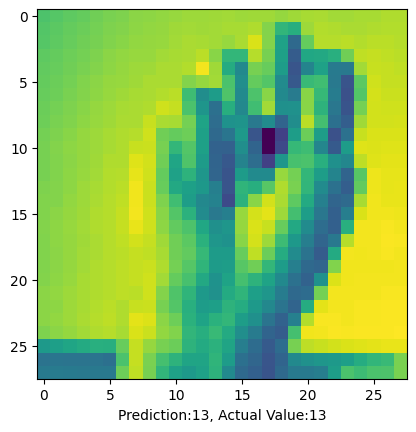

In [22]:
plt.imshow(test_data[sample].reshape(28, 28))
plt.xlabel(f"Prediction:{np.argmax(net_out_sample.detach().cpu().numpy())}, Actual Value:{test_labels[sample]}") # Convert net_out_sample to NumPy array
plt.show()